/home/pipto/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Contamination of Frequency Band:  3.2540330472411967e-06  K
Contamination of n Band:  7.811781791614404e-06  K
Total 21cm Contamination: 6.403586830370003e-06 K


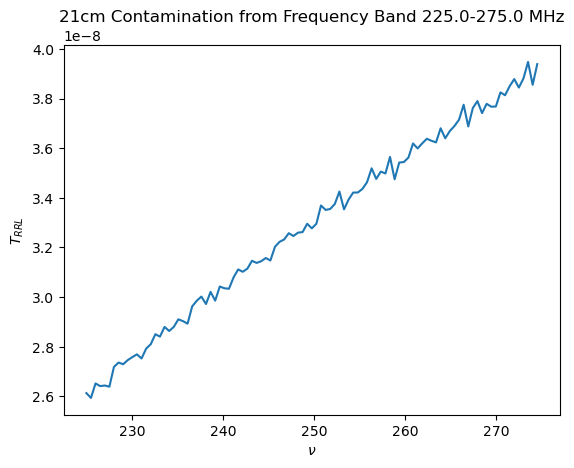

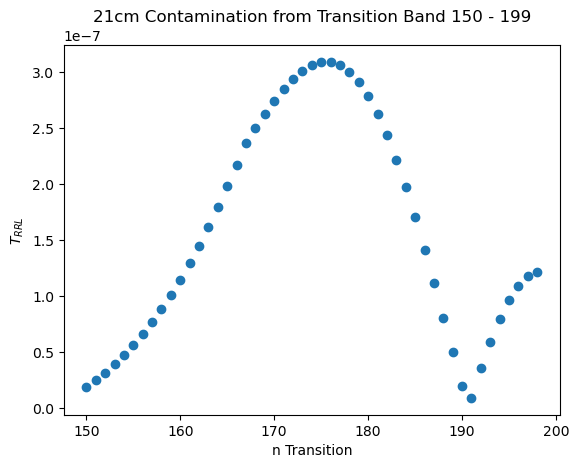

In [18]:
import numpy as np
import RRL_contam
import importlib
importlib.reload(RRL_contam)

#Redshift Bounds
z_min = 0
z_max = 6

#Observing band of 21cm
HI_freq_min = 200
HI_freq_max = 300

#HII Region Parameters
EM = 10
E_SFR = 0.1
N_HII = 1
linewidth_unshifted = 20
bandwidth = 1

#Fixed values (Temperature fixed by b values from data table)
T = 1e4
bn_file = '13_13_A_C_F.dat'
data = np.hstack(np.loadtxt(bn_file, skiprows=2))

#Transition values (for 'line_contamination' module)
n_min = 100
n_max = 450


# Bandpasses frequency and n
nu_band_min = 225
nu_band_max = 275

n_band_min = 150
n_band_max = 200

contaminationTemperature = RRL_contam.line_contamination(z_min, z_max, n_min, n_max, HI_freq_min, HI_freq_max, \
                                        EM, T, E_SFR, N_HII, linewidth_unshifted, bandwidth, data, nu_band_min, nu_band_max, n_band_min, n_band_max,\
                                                            plot_GPFit = False, plot_freqContam = True, plot_nContam = True)

print(f'Total 21cm Contamination: {contaminationTemperature} K')

In [19]:
#Returns the 21cm brightness temperature in Kelvin from a homogeneous universe with xHI=0.01
def T21(z, xHI = .01): #xHI chooses expectation of post reioniation if not specified
    return 0.009*(1+z)**(1/2)*xHI  #eqn 18 in https://arxiv.org/pdf/astro-ph/0608032
z_space = np.linspace(z_min, z_max, 100_000)
T21_val = np.sum(T21(z_space)*(z_space[1] - z_space[0]))
print(contaminationTemperature / T21_val)

0.006091545034300646
